## Literal Text Analysis on Brankas and Integra's Open Finance Whitepaper

Last July 2021, [Brankas](https://brank.as/) and [Integra Partners](https://integrapartners.co/) released a whitepaper called "[Embracing Open Finance in Southeast Asia](https://integrapartners.co/2021/07/27/embracing-open-finance-in-south-east-asia/)." The paper details the many opportunities open finance brings to the region, how banks and financial services providers can take advantage of these opportunities, and how they can overcome the related challenges.

I was curious about the words used in the whitepaper itself so I thought I would do a bit of digging. For this basic Natural Language Processing (NLP) analysis, I'll use [spaCy](https://spacy.io/) which is a free and open-source library for NLP in Python. I'll also use [pdfplumber](https://github.com/jsvine/pdfplumber) to extract the text from the whitepaper itself.

### Setting up the environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Loading the dataset

In [2]:
import pdfplumber

In [3]:
## Loading the whitepaper itself
pdf = pdfplumber.open("Open-Finance-Whitepaper-2021-July-26.pdf")

In [4]:
pdf.metadata

{'Title': 'Open Finance Whitepaper (2021 July 26).docx',
 'Producer': 'Skia/PDF m93 Google Docs Renderer'}

### Pre-processing the dataset

In [5]:
##Extracting all the pages except the title page
all_page = []

for i in range(1,49):
    i_page = pdf.pages[i] ### Loads the pages into individual objects
    i_page_text = i_page.extract_text().split() ### Extracts text from page and removes line breaks per page
    i_page_text = ' '.join(i_page_text) ### Combines words into a single string
    all_page.append(i_page_text) ### Compiles words from specified number of pages into one list

## Turns list of words into one string
all_page_text = ' '.join(all_page)

### Tokenizing the text

In [6]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [7]:
all_page_doc = nlp(all_page_text)

In [8]:
all_page_words = [token.lemma_ for token in all_page_doc if not token.is_stop and not token.is_punct]

### Word Count

Firstly, let's do a quick word count to see the common words that appeared in the paper.

In [9]:
from collections import Counter
word_freq = Counter(all_page_words)

In [10]:
word_freq = word_freq.most_common()

In [11]:
word_freq[:10]

[('bank', 148),
 ('ﬁnance', 126),
 ('open', 122),
 ('customer', 82),
 ('digital', 72),
 ('service', 66),
 ('new', 65),
 ('ﬁnancial', 62),
 ('payment', 56),
 ('|', 51)]

In [12]:
## Setting up the dataframe for further analysis
df = pd.DataFrame(word_freq, columns=['words', 'count'])
df.head()

,words,count
0,bank,148
1,ﬁnance,126
2,open,122
3,customer,82
4,digital,72


In [13]:
## Drop words that have 1 to 2 characters
df['word length'] = df['words'].str.len()
df = df[df['word length'] >=3 ]
df = df.reset_index(drop=True)

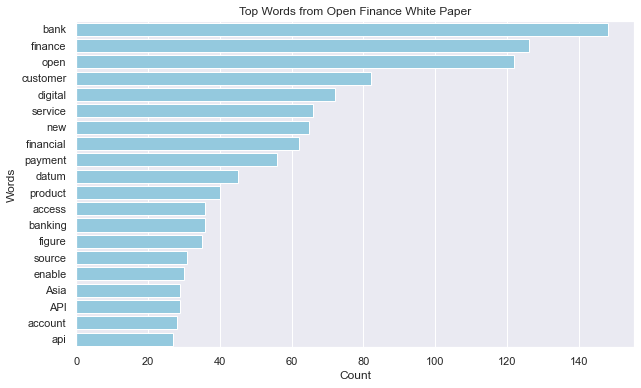

In [14]:
## Visualizing the top 20 words
plt.figure(figsize=(10,6))
sns.barplot(y='words', x='count', data=df[:20], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Top Words from Open Finance White Paper')
plt.savefig('TopWords_Brankas_Integra_OpenFinance_2021.png', dpi=400)
plt.show()

Somewhat unsurprisingly, "bank", "finance", and "open" are the top 3 words. They are the main subjects after all. We also see "customer" and "digital" rounding out the top 5. 

Further down the list, "API", "api", and "account" also appear. APIs are indeed central to enabling open finance services. Interestingly though, could there be further opportunities regarding "APIs" and "accounts"? Perhaps API products centered around financial accounts?

### Verbs

They say whitepapers are a good opportunity to call players into action. Let's explore some of the top verbs used.

In [15]:
## Extracting verbs into a list
verbs = []

for token in all_page_doc:
    if token.pos_ == 'VERB':
        verbs.append(token.lemma_)

In [16]:
## Counting each identified verb's frequency in the document
verb_freq = Counter(verbs)
verb_freq = verb_freq.most_common()

In [17]:
## Setting up the dataframe containing verbs
df_verbs = pd.DataFrame(verb_freq, columns=['verbs', 'count'])
df_verbs.head()

,verbs,count
0,enable,30
1,be,30
2,have,24
3,open,22
4,allow,19


/Users/roberttiong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 0 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/roberttiong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 0 missing from current font.
  font.set_text(s, 0, flags=flags)


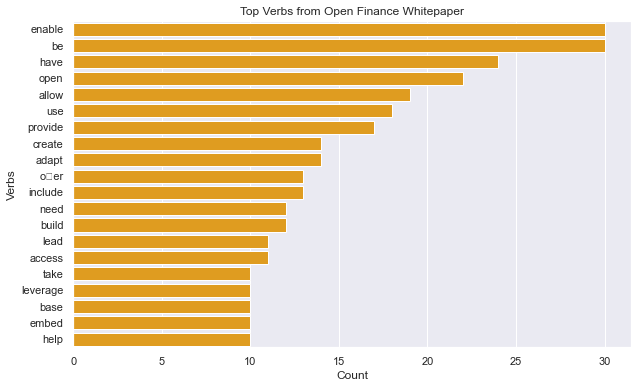

In [18]:
## Visualizing the top 20 verbs
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='verbs', data=df_verbs[:20], color='orange')
plt.xlabel('Count')
plt.ylabel('Verbs')
plt.title('Top Verbs from Open Finance Whitepaper')
plt.savefig('TopVerbs_Brankas_Integra_OpenFinance2021.png', dpi=400)
plt.show()

We see the words "enable", "open", and "allow" in the top 5 which is in theme with the message of open finance. 

We also see the words "create", "adapt" and "build." Would you need to create new systems to take advantage of the opportunities or do you need to just adapt current systems to new financial use cases?

### Organizations and Companies

Mainly out of curiousity, I wanted to also see if any organizations or companies were named in the whitepaper. It might give us an idea who are the players to watch or who would have a key role in the region.

In [19]:
## Extracting named entities and properties into a list
all_page_ents = [(ent.text, ent.label_, spacy.explain(ent.label_)) for ent in all_page_doc.ents]

In [20]:
## Putting all organizations in a list
orgs = []

for ent in all_page_doc.ents:
    if ent.label_ == 'ORG':
        orgs.append(ent.text)

In [21]:
## Counting each named organization's frequency in the document
org_freq = Counter(orgs)
org_freq = org_freq.most_common()

In [22]:
## Setting up dataframe containing organizations and their respective counts
df_orgs = pd.DataFrame(org_freq, columns=['orgs','count'])

In [23]:
df_orgs.head()

,orgs,count
0,KYC,9
1,ASEAN,8
2,Digital,8
3,Brankas,7
4,UnionBank,7


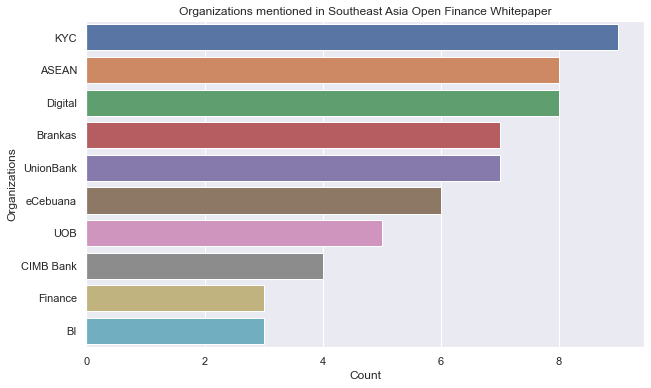

In [24]:
## Visualizing the top 10 organizations
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='orgs', data=df_orgs[:10])
plt.xlabel('Count')
plt.ylabel('Organizations')
plt.title('Organizations mentioned in Southeast Asia Open Finance Whitepaper')
plt.savefig('TopOrgs_Brankas_Integra_OpenFinance_2021.png', dpi=400)
plt.show()

Well the spaCy package isn't perfect as you can see. "KYC" and "Digital" certainly aren't organizations.

Unionbank, eCebuana, UOB, and CIMB Bank get mentioned here. Maybe they're the institutions to watch? We'll definitely see if that is the case as the opportunities continue to grow in the region.

I'm presuming "BI" here is Bank Indonesia who will surely play a big role from a regulatory standpoint in the region's biggest economy.

### Locations

Lastly, let's take a look at the locations, countries or cities mentioned.

In [25]:
## Putting all locations in a list
locs = []

for ent in all_page_doc.ents:
    if ent.label_ == 'GPE':
        locs.append(ent.text)

In [26]:
## Counting each named location's frequency in the document
locs_freq = Counter(locs)
locs_freq = locs_freq.most_common()

In [27]:
## Setting up dataframe containing locations and their respective counts
df_locs = pd.DataFrame(locs_freq, columns=['locations', 'count'])

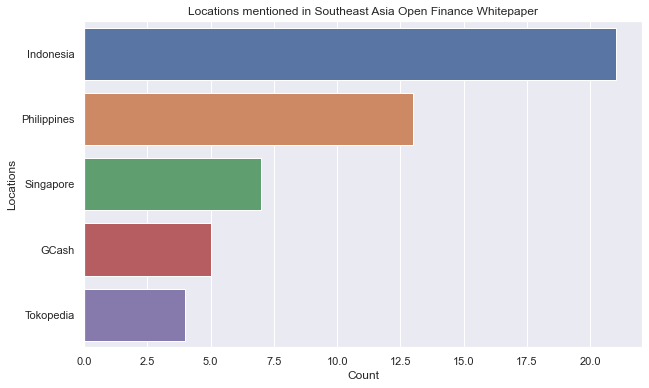

In [28]:
## Visualizing the top 5 locations
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='locations', data=df_locs[:5])
plt.xlabel('Count')
plt.ylabel('Locations')
plt.title('Locations mentioned in Southeast Asia Open Finance Whitepaper')
plt.savefig('TopLocs_Brankas_Integra_OpenFinance_2021.png', dpi=400)
plt.show()

Indonesia and the Philippines are the top 2. These countries do have a lot of need when it comes to financial infrastructure. In addition to this, they also huge unbanked and underbanked populations.

While spaCy again isn't perfect, it's interesting to see GCash here, which is the leading e-wallet in the Philippines operated by Mynt. Are they another institution to watch or perhaps even learn from when it comes to providing financial access?

---
If this at all made you more interested about Open Finance in Southeast Asia, I encourage you to check out the [whitepaper itself here](https://integrapartners.co/2021/07/27/embracing-open-finance-in-south-east-asia/). Nothing beats reading the actual thing after all.

If you want to go even deeper and take advantage of the many opportunities open finance brings, reach out to [Brankas](https://brank.as/). They can definitely help.